# Mongabay Fire Tool

In this notebook we will perform all the data processing required for the [Fire tool](https://docs.google.com/document/d/1zpwxTejaSbb7tq3uFnwVx_fzysTMBZJvnJEhuDW4vAE/edit#).

For the fire alerts we will use the VIIRS alerts coming from GFW. 
[Here](https://www.globalforestwatch.org/dashboards/country/BRA/?category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJkb3dubG9hZERhc2hib2FyZFN0YXRzIiwiZGFzaGJvYXJkQW5hbHlzZXMiLCJ3aWRnZXRTZXR0aW5ncyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6W10sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBzS2V5IjoiZG93bmxvYWREYXNoYm9hcmRTdGF0cyJ9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsInN0ZXBJbmRleCI6LTEsImZvcmNlIjp0cnVlfSwib3BlbiI6dHJ1ZSwic3RlcEluZGV4IjowLCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0In0sInN0ZXBzS2V5Ijoic2hhcmVXaWRnZXQiLCJmb3JjZSI6dHJ1ZX0%3D&fireAlertStats=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMC0xMS0zMCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTEtMjIifQ%3D%3D&location=WyJjb3VudHJ5IiwiQlJBIl0%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTUuMTI4MzAwNzgxNjIwNzUsImxuZyI6LTU0LjM5MDU3OTIxOTk5MjgxfSwiem9vbSI6My40OTg0NTEzMzAyNjUwNDUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJmaXJlLWFsZXJ0cy12aWlycyIsImxheWVycyI6WyJmaXJlLWFsZXJ0cy12aWlycyJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlLCJ0aW1lbGluZVBhcmFtcyI6eyJzdGFydERhdGVBYnNvbHV0ZSI6IjIwMjEtMDgtMjQiLCJlbmREYXRlQWJzb2x1dGUiOiIyMDIxLTExLTIyIiwic3RhcnREYXRlIjoiMjAyMS0wOC0yNCIsImVuZERhdGUiOiIyMDIxLTExLTIyIiwidHJpbUVuZERhdGUiOiIyMDIxLTExLTIyIn19XX0%3D&scrollTo=fireAlertStats&showMap=false&widget=fireAlertStats) an example of a chart with that data.

And here the endpoin to retrieve the data with a query example:

```
https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/v202105/query/json?sql=SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat FROM data WHERE iso = 'BRA' AND confidence__cat = 'h' and alert__year = 2021 GROUP BY iso, alert__year, alert__week, confidence__catt to retrieve the data with a query example:

```

For the precipitation data we will use the [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description). Notice that this dataset doesn’t cover the whole world.


The chart will include the following elements:
- moving average of weekly precipitation.
- long-term average of weekly precipitation.
- Cumulative fire alerts
- long-term average of cumulative fire alerts.

The scope of the geographical data should be national (iso) or regional (adm1). 


# Setup
## Library import
We import all the required Python libraries

In [1]:
import os
import ee
import wxee
import geemap
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray_leaflet
import ipyleaflet as ipyl
import json

ee.Initialize()

# Data import
## [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description)
**Automated conversion from Earth Engine JavaScripts to Python scripts**

In [ ]:
js_dir = '/home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing'
geemap.conversion.js_to_python_dir(in_dir=js_dir, out_dir=js_dir, use_qgis=True)
print("Python scripts saved at: {}".format(js_dir))

**Read data from GEE**

In [57]:
gadm36 = ee.FeatureCollection('projects/wri-datalab/gadm36')

dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date('2021-10-01', '2021-10-31'))
chirps = dataset.select('precipitation')

# Select AOI
iso = "BRA"
aoi = gadm36 \
  .filterMetadata("iso", "equals", iso)

# Get last image
#chirps=chirps.limit(1, 'system:time_start', False).first()

#chirps = chirps.clip(aoi.geometry())


def func_vee(image):
    return image.clip(aoi.geometry())

chirps = chirps.map(func_vee)

chirpsVis = {
    'min': 1.0,
    'max': 17.0,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
  }

Map = geemap.Map(center=(-20, -45), zoom=6)
Map.addLayer(chirps, chirpsVis, 'Precipitation')
Map

Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

**Convert the `ee.ImageCollection` to `xarray.DataArray` with [wxee](https://github.com/aazuspan/wxee)**

In [3]:
da = chirps.wx.to_xarray(scale=5566)
da

Requesting data:   0%|          | 0/30 [00:00<?, ?it/s]

ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installat

<xarray.Dataset>
Dimensions:        (time: 30, y: 781, x: 894)
Coordinates:
  * time           (time) datetime64[ns] 2021-10-01 2021-10-02 ... 2021-10-30
  * y              (y) float64 5.275 5.225 5.175 5.125 ... -33.63 -33.68 -33.73
  * x              (x) float64 -73.98 -73.93 -73.88 ... -29.43 -29.38 -29.33
Data variables:
    precipitation  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    transform:               (0.050000228714092564, 0.0, -74.000338496857, 0....
    crs:                     +proj=longlat +datum=WGS84 +no_defs=True
    res:                     (0.050000228714092564, 0.050000228714092564)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

**Display data with `matplotlib`**

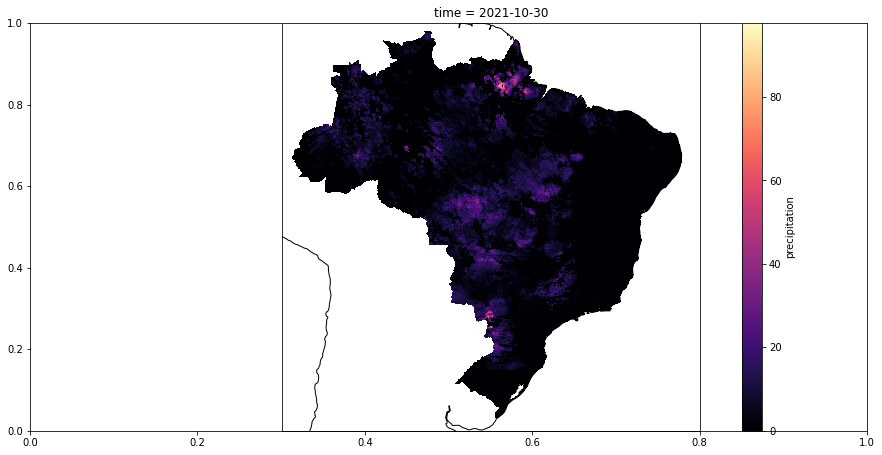

In [4]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

da['precipitation'].isel(time=-1).plot.pcolormesh(ax=ax, cmap='magma', transform=ccrs.PlateCarree(), x='x', y='y', add_colorbar=True)
ax.coastlines()

lon_min, lat_min, lon_max, lat_max = (-74, -34, -34, 5)
ax.set_ylim([lat_min-1,lat_max+1]);
ax.set_xlim([lon_min-1,lon_max+1]);

**Display data with `ipyleafle`**

In [5]:
import rioxarray
m = ipyl.Map()
l = da['precipitation'].isel(time=-1).leaflet.plot(m)
m.add_layer(l)
m

Url()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

**Compute mean value over time**

In [6]:
mean_values = da['precipitation'].sum(['x', 'y']).values

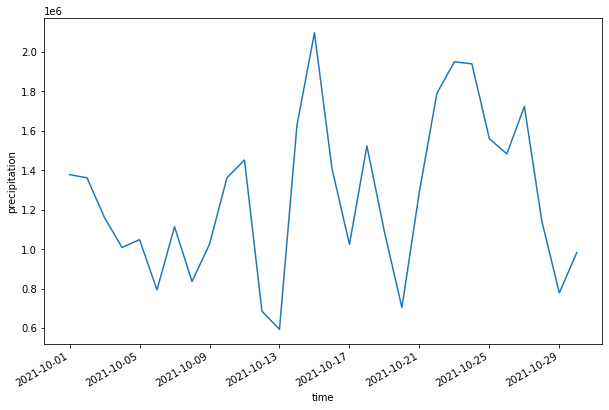

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
da['precipitation'].sum(['x', 'y']).plot(ax=ax)

**Get mean value over time using GEE**

In [56]:
geometry = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -60.90820312499999,
              -12.039320557540572
            ],
            [
              -51.767578125,
              -12.039320557540572
            ],
            [
              -51.767578125,
              0.4394488164139768
            ],
            [
              -60.90820312499999,
              0.4394488164139768
            ],
            [
              -60.90820312499999,
              -12.039320557540572
            ]
          ]
        ]
      }
    }
  ]
}

geometry = json.dumps(geometry)
geometry = json.loads(geometry)

In [9]:
# Get last image
image=chirps.limit(1, 'system:time_start', False).first()
image = image.clip(aoi.geometry())

In [83]:
%%time
regReducer = {
    'geometry': ee.Geometry(geometry.get('features')[0].get('geometry')),
    'reducer': ee.Reducer.mean(),
}

image.reduceRegion(**regReducer).get('precipitation').getInfo()

CPU times: user 5.92 ms, sys: 444 µs, total: 6.37 ms
Wall time: 19.6 s


7.101647349497237

In [82]:
%%time
regReducer = {
    'collection': ee.FeatureCollection(geometry.get('features')),
    'reducer': ee.Reducer.mean(),
    'scale': 5566
}

mean = image.reduceRegions(**regReducer).toList(1).getInfo()[0].get('properties').get('mean')
mean

CPU times: user 1.95 ms, sys: 5.68 ms, total: 7.64 ms
Wall time: 16.3 s


7.099828767549381

In [14]:
count = chirps.size()
listOfImages = chirps.toList(count)

In [17]:
count.getInfo()

30

In [101]:
regReducer = {
    'geometry': ee.Geometry(geometry.get('features')[0].get('geometry')),
    'reducer': ee.Reducer.mean(),
    'tileScale': 8,
    'bestEffort': True
}

def func_mean(img):
    reduction = img.reduceRegion(**regReducer)
    properties = img.toDictionary(img.propertyNames()).combine(reduction)#.combine(img.toDictionary(['system:time_start', 'system:footprint', 'system:asset_size', 'system:index','time_start','time_end']))
    return ee.Feature(None, reduction)

In [112]:
def func_proper(feat):
    return ee.Number(ee.Feature(feat).toDictionary().get('precipitation'))

ee.FeatureCollection(chirps.map(func_mean)).toList(count).map(func_proper).getInfo()#.getArray('precipitation').getInfo()

[5.414181648164591,
 7.675094818662783,
 2.12912070883458,
 2.326193595128904,
 2.547428450574938,
 1.7487171216710824,
 3.139246265305892,
 4.327180711076758,
 1.3396722972288848,
 1.437275578097734,
 4.424998563680793,
 2.7833654607489247,
 1.614912773837303,
 0.8191377604420892,
 2.9972972519284182,
 1.6701007680321476,
 4.482178648203028,
 7.676394893495957,
 3.512305101178241,
 2.806198930862875,
 6.317253088654757,
 7.101647349497247,
 7.6579628471903725,
 3.261964198565941,
 5.8609172860228655,
 8.031244882727435,
 16.574304702578697,
 5.859566362492519,
 2.875260044218116,
 4.909956544542844]